# 1 - Packages

In [ ]:
import numpy as np
from testCases import *
from public_tests import *
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

%load_ext autoreload
%autoreload 2

<a name='4'></a>
## 4 - 1-Dimensional Gradient Checking

Consider a 1D linear function $J(\theta) = \theta x$. The model contains only a single real-valued parameter $\theta$, and takes $x$ as input.

You will implement code to compute $J(.)$ and its derivative $\frac{\partial J}{\partial \theta}$. You will then use gradient checking to make sure your derivative computation for $J$ is correct. 

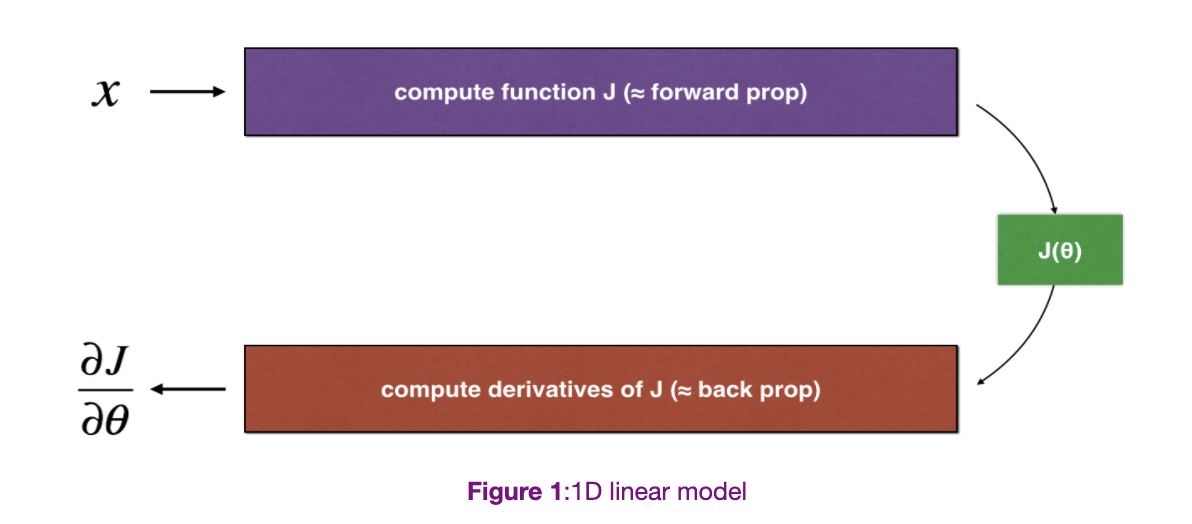

The diagram above shows the key computation steps: First start with $x$, then evaluate the function $J(x)$ ("forward propagation"). Then compute the derivative $\frac{\partial J}{\partial \theta}$ ("backward propagation"). 

<a name='ex-1'></a>
### Exercise 1 - forward_propagation

Implement `forward propagation`. For this simple function compute $J(.)$

# 2 - 1 - Dimentional Gradient Checking

In [ ]:
def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (compute J) presented in Figure 1 (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    # (approx. 1 line)
    # J = 
    # YOUR CODE STARTS HERE
    J = np.dot(theta, x)    
    # YOUR CODE ENDS HERE
    
    return J

In [ ]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))
forward_propagation_test(forward_propagation)

In [ ]:
def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta (see Figure 1).
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    # (approx. 1 line)
    # dtheta = 
    # YOUR CODE STARTS HERE
    dtheta = x
        
    # YOUR CODE ENDS HERE
    
    return dtheta

In [ ]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))
backward_propagation_test(backward_propagation)

In [ ]:
# GRADED FUNCTION: gradient_check

def gradient_check(x, theta, epsilon=1e-7, print_msg=False):
    """
    Implement the backward propagation presented in Figure 1.
    
    Arguments:
    x -- a float input
    theta -- our parameter, a float as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient. Float output
    """
    
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    # (approx. 5 lines)
    # theta_plus =                                 # Step 1
    # theta_minus =                                # Step 2
    # J_plus =                                    # Step 3
    # J_minus =                                   # Step 4
    # gradapprox =                                # Step 5
    # YOUR CODE STARTS HERE
    thetaplus = theta + epsilon                               
    thetaminus = theta - epsilon                            
    J_plus = forward_propagation(x, thetaplus)                
    J_minus = forward_propagation(x, thetaminus)              
    gradapprox = (J_plus - J_minus) / (2 * epsilon)     
    
    # YOUR CODE ENDS HERE
    
    # Check if gradapprox is close enough to the output of backward_propagation()
    #(approx. 1 line) DO NOT USE "grad = gradapprox"
    # grad =
    # YOUR CODE STARTS HERE
    grad = backward_propagation(x, theta)
        
    # YOUR CODE ENDS HERE
    
    #(approx. 1 line)
    # numerator =                                 # Step 1'
    # denominator =                               # Step 2'
    # difference =                                # Step 3'
    # YOUR CODE STARTS HERE
    numerator = np.linalg.norm(grad - gradapprox)                      # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)    # Step 2'
    difference = numerator / denominator                               # Step 3'    
    
    # YOUR CODE ENDS HERE
    if print_msg:
        if difference > 2e-7:
            print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
        else:
            print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [ ]:
x, theta = 2, 4
difference = gradient_check(2,4, print_msg=True)

#gradient_check_test(gradient_check)

In [ ]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    cache -- a tuple with the intermediate values (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    """
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    log_probs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1. / m * np.sum(log_probs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [ ]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1. / m * np.dot(dZ3, A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1. / m * np.dot(dZ2, A1.T) * 2
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 4. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [ ]:
# GRADED FUNCTION: gradient_check_n

def gradient_check_n(parameters, gradients, X, Y, epsilon=1e-7, print_msg=False):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        #(approx. 3 lines)
        # theta_plus =                                        # Step 1
        # theta_plus[i] =                                     # Step 2
        # J_plus[i], _ =                                     # Step 3
        # YOUR CODE STARTS HERE
        thetaplus =  np.copy(parameters_values) 
        thetaplus[i][0] = thetaplus[i][0] + epsilon 
        J_plus[i], _ =  forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))
        # YOUR CODE ENDS HERE
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        #(approx. 3 lines)
        # theta_minus =                                    # Step 1
        # theta_minus[i] =                                 # Step 2        
        # J_minus[i], _ =                                 # Step 3
        # YOUR CODE STARTS HERE
        thetaminus = np.copy(parameters_values)  
        thetaminus[i][0] = thetaminus[i][0] - epsilon
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))
        # YOUR CODE ENDS HERE
        
        # Compute gradapprox[i]
        # (approx. 1 line)
        # gradapprox[i] = 
        # YOUR CODE STARTS HERE
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
                
        # YOUR CODE ENDS HERE
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    # (approx. 1 line)
    # numerator =                                             # Step 1'
    # denominator =                                           # Step 2'
    # difference =                                            # Step 3'
    # YOUR CODE STARTS HERE
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator / denominator
    
    # YOUR CODE ENDS HERE
    if print_msg:
        if difference > 2e-7:
            print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
        else:
            print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")

    return difference

In [ ]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y, 1e-7, True)
expected_values = [0.2850931567761623, 1.1890913024229996e-07]
assert not(type(difference) == np.ndarray), "You are not using np.linalg.norm for numerator or denominator"
assert np.any(np.isclose(difference, expected_values)), "Wrong value. It is not one of the expected values"